### 연속형 독립변수가 하나인 모델 - 단순회귀

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리(경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 데이터 불러오기
beer = pd.read_csv('/content/drive/MyDrive/python study/Statistics/dataset/5-1-1-beer.csv')
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


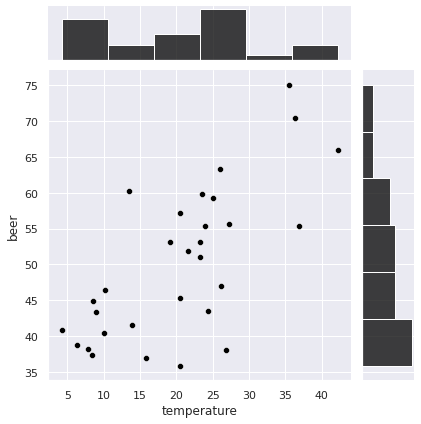

In [3]:
# 산포도로 기온과 맥주 매상의 관계 보기
sns.jointplot(x = 'temperature', y = 'beer',
              data = beer, color = 'black')

#### 모델 구축
맥주 매상 ~ N(b0 + b1*기온, s2)  

종속변수에 맥주 매상, 독립변수에 기온을 사용한 정규선형모델을 구축한다.

모델 구축의 장점  :  

1) 현상을 해석할 수 있다.  
- 계수 b1이 0이 아니라고 판단할 수 있게 되면 맥주 매상은 기온의 영향을 받는다고 판단할 수 있다.  
- 계수 b1의 부호를 알면 기온이 오르면 맥주 매상이 올라갈지 떨어질지 판단할 수 있다. 
- 계수 검정 대신 AIC를 이용한 모델 선택 가능

2) 예측이 가능하다.
- 계수 b0과 b1, 기온을 알면 맥주 매상의 기댓값을 계산할 수 있다.

In [4]:
# statsmodels를 이용한 모델링
lm_model = smf.ols(formula = 'beer ~ temperature', data = beer).fit()

In [5]:
# summary 함수 사용하여 추정 결과 표시
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.11e-05
Time:                        13:02:06   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### summmary 함수의 출력 내용 설명
p값이 매우 작아 0이 되었으므로, 기온에 대한 계수는 유의미하게 0과 다르다고 판단할 수 있다. 즉, 기온이 맥주 매상에 영향을 끼친다는 것을 알 수 있다. 기온의 coef값이 0.7654로 양수이므로 기온이 오르면 맥주 매상이 오른다고 판단 할 수 있다. 이 정도 해석은 산포도를 보고 알 수 있지만, 독립변수가 많아지는 등 복잡한 모델의 경우에은 모델을 구축하고 그 계수를 보는 것이 해석하기 쉽다.

* Dep.Variable : 종속변수의 이름. Dep은 Depended의 약자로 종속변수라는 의미
* Model, Method : 범용최소제곱법을 사용했다는 설명
* Date, Time : 모델을 추정한 일시
* No.Observations : 샘플사이즈
* Df Residuals : 샘플사이즈에서 추정된 파라미터 수를 뺀 것
* Df Model : 사용된 독립변수의 수
* Covariance Type : 공분산 타입. 특별히 지정하지 않으면 nonrobust가 됨
* R-squared, Adj. R-squared : 결정계수와 자유도 조정이 끝난 결정계수
* F-statistic, Prob(F-statistic) : 분산분석 결과
* Log-Likelihood : 최대로그우도
* AIC : 아카이케 정보 기준
* BIC : 베이즈 정보 기준

#### AIC를 이용한 모델 선택

In [6]:
null_model = smf.ols('beer ~ 1', data = beer).fit()

In [7]:
null_model.aic

227.942

In [8]:
lm_model.aic

208.909

AIC = -2*(최대로그우도 - 추정된 파라미터 수)

In [9]:
lm_model.llf

-102.455

In [10]:
lm_model.df_model

1.000

In [11]:
-2*(lm_model.llf - (lm_model.df_model + 1))

208.909

#### seaborn을 이용한 회귀직선 그래프 그리기

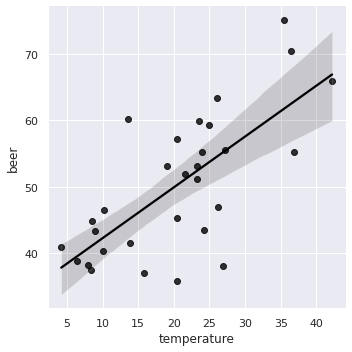

In [13]:
sns.lmplot(x = 'temperature', y= 'beer', data= beer,
           scatter_kws = {'color':'black'},    # 산포도의 디자인
           line_kws = {'color':'black'})       # 회귀직선의 디자인

# 음영 부분은 회귀직선의 95% 신뢰구간

#### 모델을 이용한 예측

In [14]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [15]:
# 기온값을 지정해서 예측 가능
# 파라미터로 데이터프레임을 넘기고 기온이 0도일 때의 맥주 매상 기댓값 계산
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [16]:
# 기온이 0도일 때는 예측값이 b0과 같아지므로 params로 확인
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [17]:
# 기온이 20도일 때 맥주 매상 기댓값
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [18]:
# beta0 + beta1 * 20의 계산 결과와 비교
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

beta0 + beta1 * temperature

49.919

#### 모델 평가 - 1) 잔차 계산

In [19]:
# resid로 잔차 출력
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [20]:
# 잔차 직접 계산
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [21]:
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

#### 모델 평가 - 2) 결정계수

In [22]:
# 결정계수 직접 계산
u = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat - mu)**2) / np.sum((y - mu)**2)

0.504

In [ ]:
# rsquared로 결정계수 출력

In [23]:
lm_model.rsquared

0.504

In [ ]:
# 결정계수 식 분해

In [25]:
np.sum((yhat - mu)**2) + sum(resid**2)

3277.115

In [26]:
np.sum((y - mu)**2)

3277.115

In [27]:
1 - np.sum(resid**2) / np.sum((y - mu)**2)

0.504

#### 모델 평가 - 3) 수정된 결정계수
- 독립변수의 수가 늘어나는 것에 대해 페널티를 적용한 결정계수  
- 독립변수의 수가 늘어나면 결정계수는 큰 값이 되고, 결정계수가 커지면 과학습을 일으키기 때문에 조정이 필요함

In [29]:
# 직접 계산
n = len(beer.beer)
s = 1
1 - ((np.sum(resid**2) / (n - s - 1)) / (np.sum((y - mu)**2) / (n - 1)))

0.486

In [30]:
# 함수 사용
lm_model.rsquared_adj

0.486

#### 모델 평가 - 4) 잔차 그래프
잔차의 특징을 보기 위해 히스토그램을 그리고 정규분포의 특징이 있는지 눈으로 확인

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


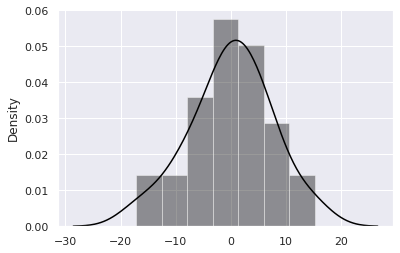

In [32]:
sns.distplot(resid, color = 'black');

# 좌우대칭으로 정규분포를 따르는 것처럼 보임

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


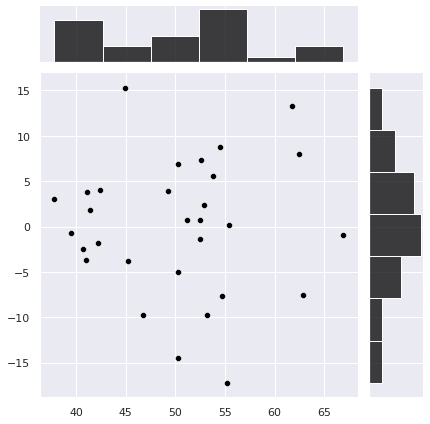

In [34]:
# X축이 적합도, Y축이 잔차
# 산포도가 완전 랜덤이며 상관이 없음. 매우 큰 잔차가 나오지 않음
sns.jointplot(lm_model.fittedvalues, resid,
              joint_kws={'color':'black'},
              marginal_kws={'color':'black'})

#### 모델 평가 - 5) Q-Q 플롯
- 이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린것
- 이론상의 분위점과 실제 데이터의 분위점을 비교하는 것으로 잔차가 정규분포에 근접하는지 아닌지 시각적으로 판단할 수 있음

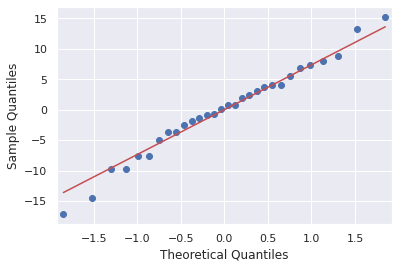

In [36]:
fig = sm.qqplot(resid, line='s')    # line='s' : 잔차가 정규분포를 따르면 이 선상에 위치한다는 기준 표시

In [37]:
# Q-Q 플롯 직접 만들기
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [38]:
# 샘플사이즈를 30으로 하여 가장 작은 데이터는 하위 몇 %에 위치한다고 할지 생각 -> 1/31
1/31

0.032

In [40]:
# 30개의 샘플 데이터에 대해 모두 위 계산을 하면 그 결과가 이론상의 누적확률이 됨
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [42]:
# 정규분포의 퍼센트포인트를 사용하여 이론상의 분위점 계산
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


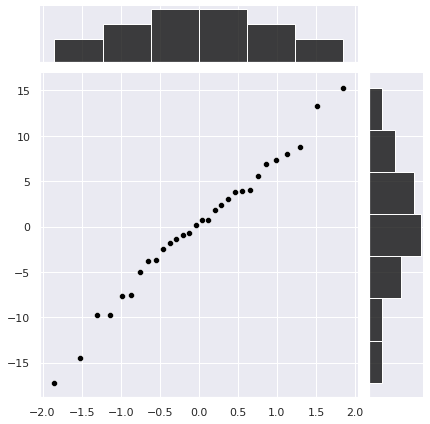

In [44]:
# X축이 이론상의 분위점(ppf), Y축이 정렬된 데이터(resid_sort)
sns.jointplot(ppf, resid_sort,
              joint_kws={'color':'black'},
              marginal_kws={'color':'black'})

#### 모델 평가 - 6) summary 함수의 출력으로 보는 잔차 체크
- Prob(Omnibus)와 Prob(JB) : 잔차의 정규성에 대한 검정 결과
- 귀무가설 : 잔차가 정규분포를 따른다 / 대립가설 : 잔차가 정규분포와 다르다
- Skew(왜도), Kurtosis(첨도) : 검정의 비대칭성이 있으므로 p값이 0.05보다 크다고 해도 정규분포라고 주장할 수 없음
- Durbin-Watson : 잔차의 자기상관을 체크하는 지표, 2 전후라면 문제 없다고 판단할 수 있음. 시계열 데이터를 대상으로 분석할 때는 반드시 Durbin-Watson이 2 전후임을 확인해야 함. 잔차에 자기상관이 있으면 계수의 t검정 결과를 신뢰할 수 없음. Durbin-Watson 통계량이 2보다 크게 차이가 난다면 일반화 제곱법 등을 검토해야 함


In [46]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.11e-05
Time:                        13:41:39   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""